# Data Visualization 
##### By rahul agrawal
## Loading important libraries

In [2]:
# Imp libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#  Seting up the Figure size 

from matplotlib import rcParams

# figure size in inches (width, height)
rcParams['figure.figsize'] = 7,7
#  set up the box on the plot to false
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#  choose default color for the plot
# from cycler import cycler
# rcParams['axes.prop_cycle'] = cycler(color=['#365977'])

#  select line weight
rcParams['lines.linewidth'] = 2

## Loading sample data

In [4]:
#  loading sample data

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data 
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

## Null count heatmap

Text(59.0, 0.5, 'Null Count')

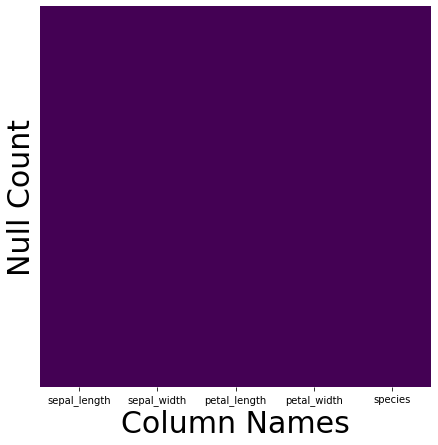

In [64]:

s = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


s.set_xlabel('Column Names', fontsize=30)
s.set_ylabel('Null Count', fontsize=30)

## Plotting Pie chart for a column to visualize the unique data counts

In [65]:
#  get column list that can be visualized through pie chart
threshold = 10
col_list = []

for col in df.columns:
    if df[col].value_counts().count() < threshold:
        col_list.append(col)
        
print("Avialable columns for pie chart: ", col_list)

Avialable columns for pie chart:  ['species']


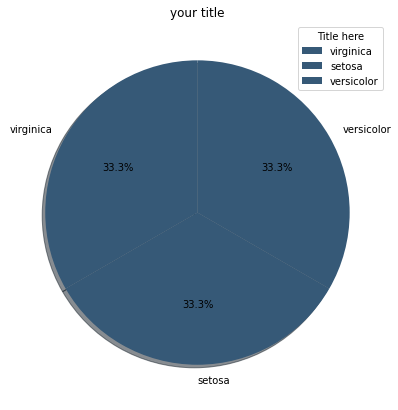

In [66]:
#  Plotting pie chart for column values
col_name = 'species'

#  getting unique values names
unique_values = df[col_name].value_counts().index

#  getting respective counts
unique_values_count = df[col_name].value_counts().values


plt.pie(unique_values_count,labels=unique_values,autopct='%1.1f%%',shadow=True,startangle=90 )
plt.legend(title = "Title here")
plt.title("your title")
plt.show() 

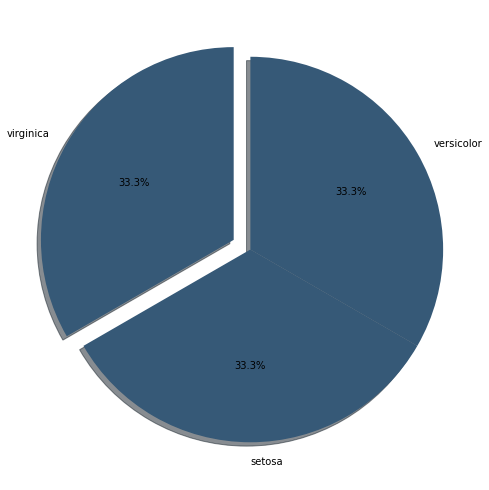

In [67]:
#  Plotting pie chart for column values
col_name = 'species'

#  getting unique values names
unique_values = df[col_name].value_counts().index

#  getting respective counts
unique_values_count = df[col_name].value_counts().values


explode = np.zeros(len(unique_values))
explode[0] = 0.1
fig1, ax1 = plt.subplots()
ax1.pie(unique_values_count,labels=unique_values,autopct='%1.1f%%',shadow=True,startangle=90 ,explode=explode )
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

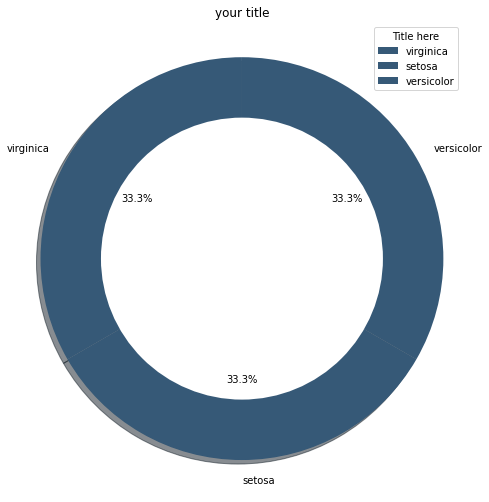

In [68]:
fig1, ax1 = plt.subplots()
ax1.pie(unique_values_count,labels=unique_values,autopct='%1.1f%%',shadow=True,startangle=90 )
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend(title = "Title here")
plt.title("your title")
plt.show()

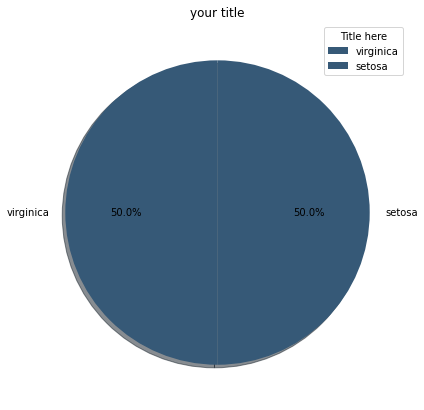

In [69]:
# considering first n values

col_name = 'species'

consider_first_n_values = 2    # start from 1 
#  getting unique values names
unique_values = df[col_name].value_counts().index

unique_values = unique_values[:consider_first_n_values]
#  getting respective counts
unique_values_count = df[col_name].value_counts().values
unique_values_count = unique_values_count[:consider_first_n_values]

plt.pie(unique_values_count,labels=unique_values,autopct='%1.1f%%',shadow=True,startangle=90 )
plt.legend(title = "Title here")
plt.title("your title")
plt.show() 

# plotting reletion between two columns/features
### JoinPlot
#### A join plot allows to study the relationship between 2 numeric variables. The central chart display their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot

In [70]:
col1  = "sepal_length"
col2 = "sepal_width"

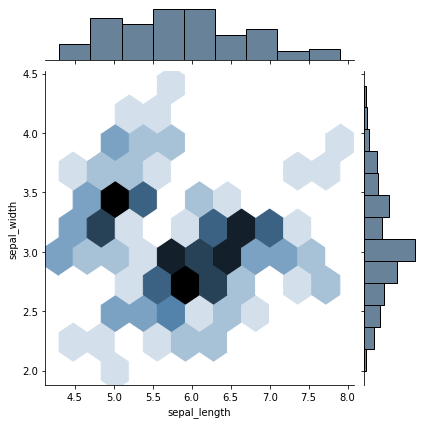

In [71]:
sns.jointplot(x=col1,y=col2,data=df,kind='hex')


Text(0.5, 0.98, 'using reg')

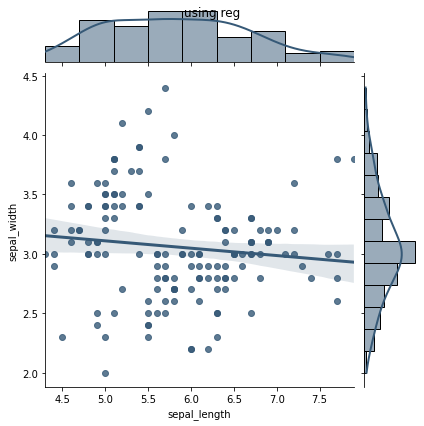

In [72]:

p = sns.jointplot(x=col1,y=col2,data=df,kind='reg')
p.fig.suptitle("using reg")

Text(0.5, 0.98, 'using kde')

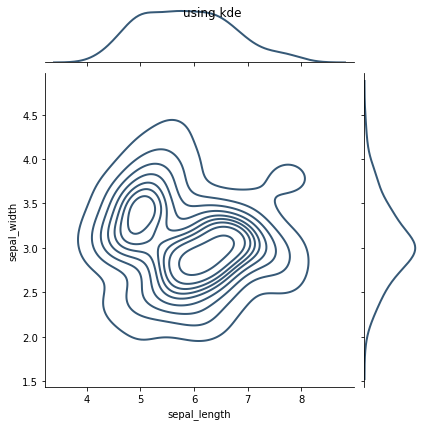

In [73]:
p = sns.jointplot(x=col1,y=col2,data=df,kind='kde')
p.fig.suptitle("using kde")

# (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

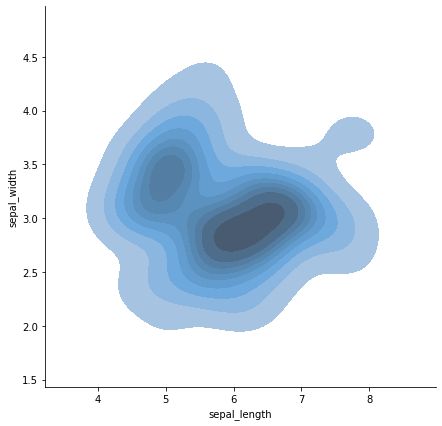

In [74]:
sns.kdeplot(
    data=df, x=col1, y=col2,  fill=True,
)

## Using Heatmap



In [75]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Heatmap For Correlation')

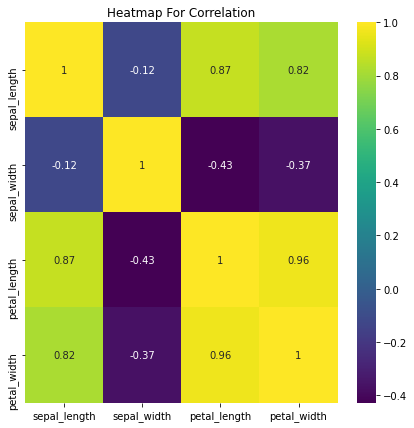

In [76]:
sns.heatmap(df.corr() , annot=True, cmap='viridis').set_title("Heatmap For Correlation") 

# annot = True means to annotate the heatmap with the correlation values like 0.8, 0.5, etc.

## Using Pairplot

#### A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value, like this: Pairs plots are just elaborations on this, showing all variables paired with all the other variables

In [77]:
# sns.pairplot(df , hue = 'species')

# Visualizing the distribution of data 

### Dist plot
#### Dist plot helps us to check the distribution of the columns feature
####  * should be only type int or float

C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

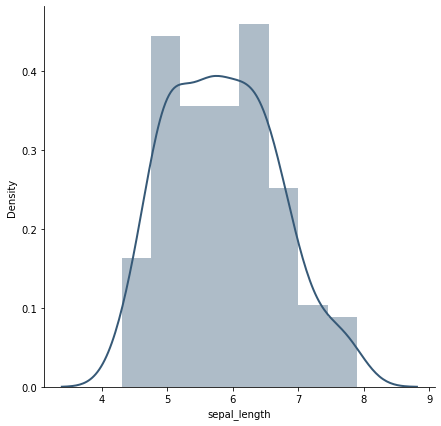

In [78]:
sns.distplot(df['sepal_length'])

C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length'>

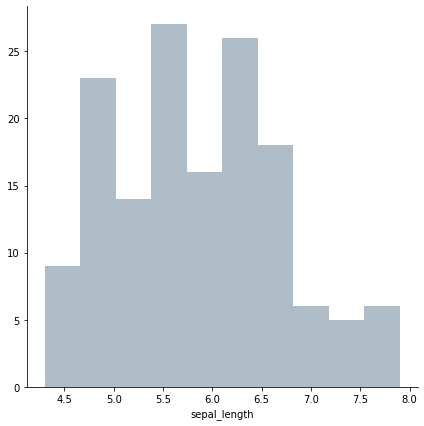

In [79]:
sns.distplot(df['sepal_length'],kde=False,bins=10)

# Categorical Plots

C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

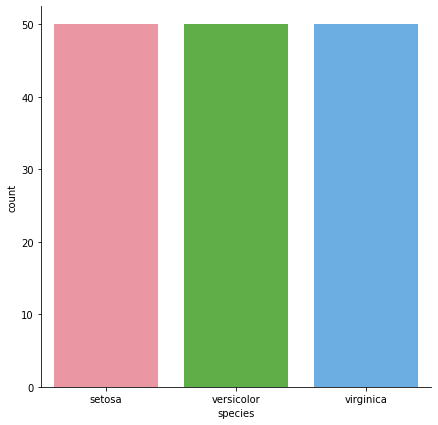

In [80]:

## Count plot

col = "species"
sns.countplot(col,data=df)


# continuous variables, a pyplot.hist or seaborn.distplot may be used. For discrete variables, a seaborn.countplot is more convenient.

<AxesSubplot:xlabel='count', ylabel='species'>

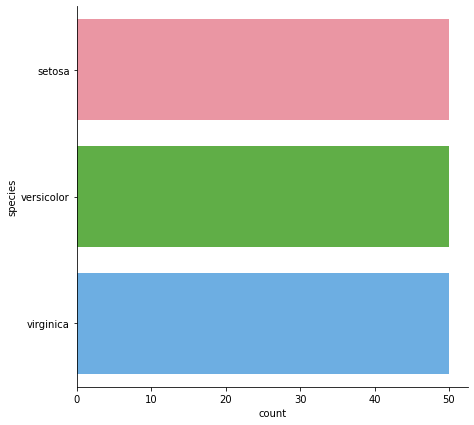

In [81]:
#  same but with y - axis

## Count plot

col = "species"
sns.countplot(y=col,data=df)

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

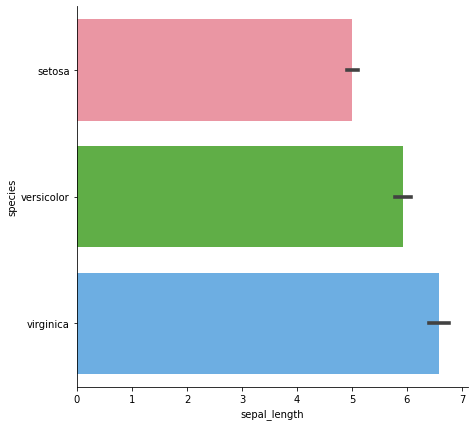

In [82]:
## Bar plot
sns.barplot(x='sepal_length',y=col,data=df) 

#  used to plot the distribution of values in a categorical variable.

<AxesSubplot:ylabel='Count'>

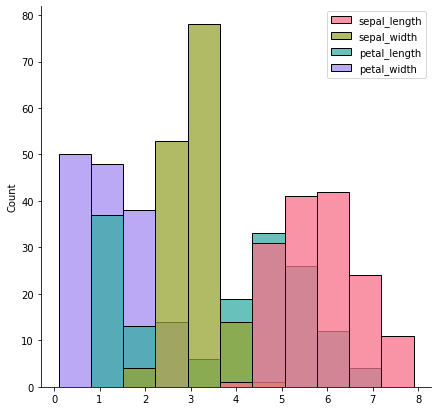

In [98]:
sns.histplot(data=df)   # for all

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

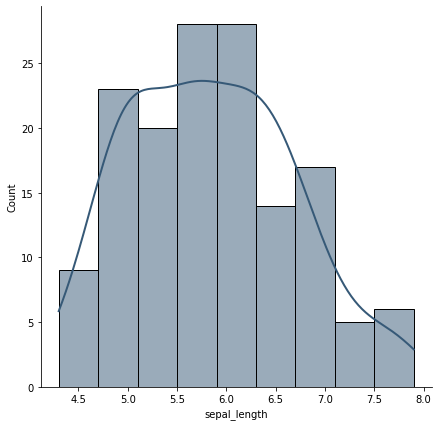

In [118]:
sns.histplot(data=df["sepal_length"] , kde=True )  # visualizing PDF (Probability Density Function)

C:\Users\Rahul Agrawal\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

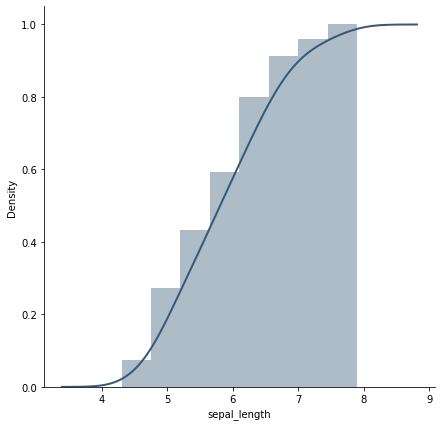

In [121]:
#  Visualizing CDF (Cumulative Distribution Function)

kwargs = {'cumulative': True}
sns.distplot(df["sepal_length"] , hist_kws=kwargs, kde_kws=kwargs )

<AxesSubplot:ylabel='Proportion'>

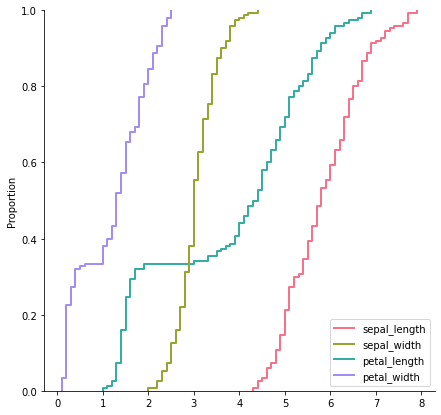

In [125]:
#  CDF using ECDF plot

# sns.ecdfplot(df["sepal_length"])   # for single column

sns.ecdfplot(df)   # for all column

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

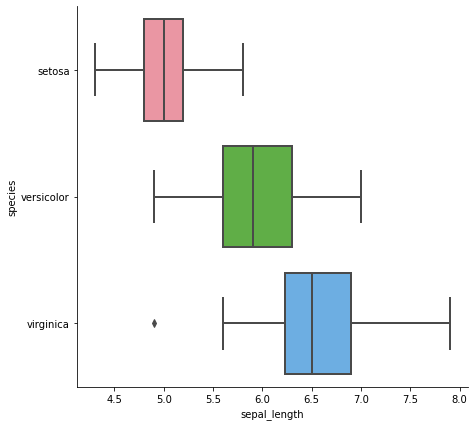

In [90]:
sns.boxplot(x='sepal_length',y=col, data=df)     # set hue=  col_name to plot the boxplot based o that column


#  used to plot the distribution of values in a categorical variable to get outliers based on catagories

<AxesSubplot:>

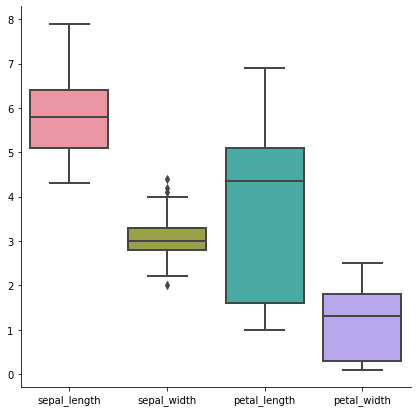

In [87]:
sns.boxplot(data=df,orient='v' )
#  for every column having numerical values

<AxesSubplot:>

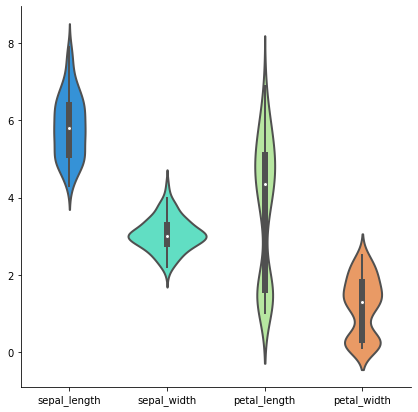

In [85]:
sns.violinplot( data=df,palette='rainbow')

# Violin plot helps us to see both the distribution of data in terms of Kernel density estimation and the box plot